In [22]:
import yt
import numpy as np

In [23]:
plot_num = 0
diag_num = 0
plot_num += 1000000
diag_num += 1000000
plot_num_list = list(str(plot_num))
diag_num_list = list(str(diag_num))
plot_num_list[0] = '0'
diag_num_list[0] = '0'
plotname = "plt"+"".join(plot_num_list)
diagname = "diag"+"".join(diag_num_list)

In [24]:
dplot = yt.load(plotname)
ddiag = yt.load(diagname)

yt : [INFO     ] 2020-12-29 13:49:13,841 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-12-29 13:49:13,842 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2020-12-29 13:49:13,844 Parameters: domain_left_edge          = [-20. -20.   0.]
yt : [INFO     ] 2020-12-29 13:49:13,846 Parameters: domain_right_edge         = [20. 20.  1.]
yt : [INFO     ] 2020-12-29 13:49:13,872 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-12-29 13:49:13,873 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2020-12-29 13:49:13,873 Parameters: domain_left_edge          = [-20. -20.   0.]
yt : [INFO     ] 2020-12-29 13:49:13,874 Parameters: domain_right_edge         = [20. 20.  1.]


In [25]:
print(dplot.field_list)
print(ddiag.field_list)

[('boxlib', 'AL3'), ('boxlib', 'Phi')]
[]


yt : [INFO     ] 2020-12-29 13:49:14,799 xlim = -20.000000 20.000000
yt : [INFO     ] 2020-12-29 13:49:14,800 ylim = -20.000000 20.000000
yt : [INFO     ] 2020-12-29 13:49:14,800 xlim = -20.000000 20.000000
yt : [INFO     ] 2020-12-29 13:49:14,801 ylim = -20.000000 20.000000
yt : [INFO     ] 2020-12-29 13:49:14,802 Making a fixed resolution buffer of (('boxlib', 'Phi')) 800 by 800
yt : [INFO     ] 2020-12-29 13:49:14,916 Making a fixed resolution buffer of (('boxlib', 'Phi')) 800 by 800



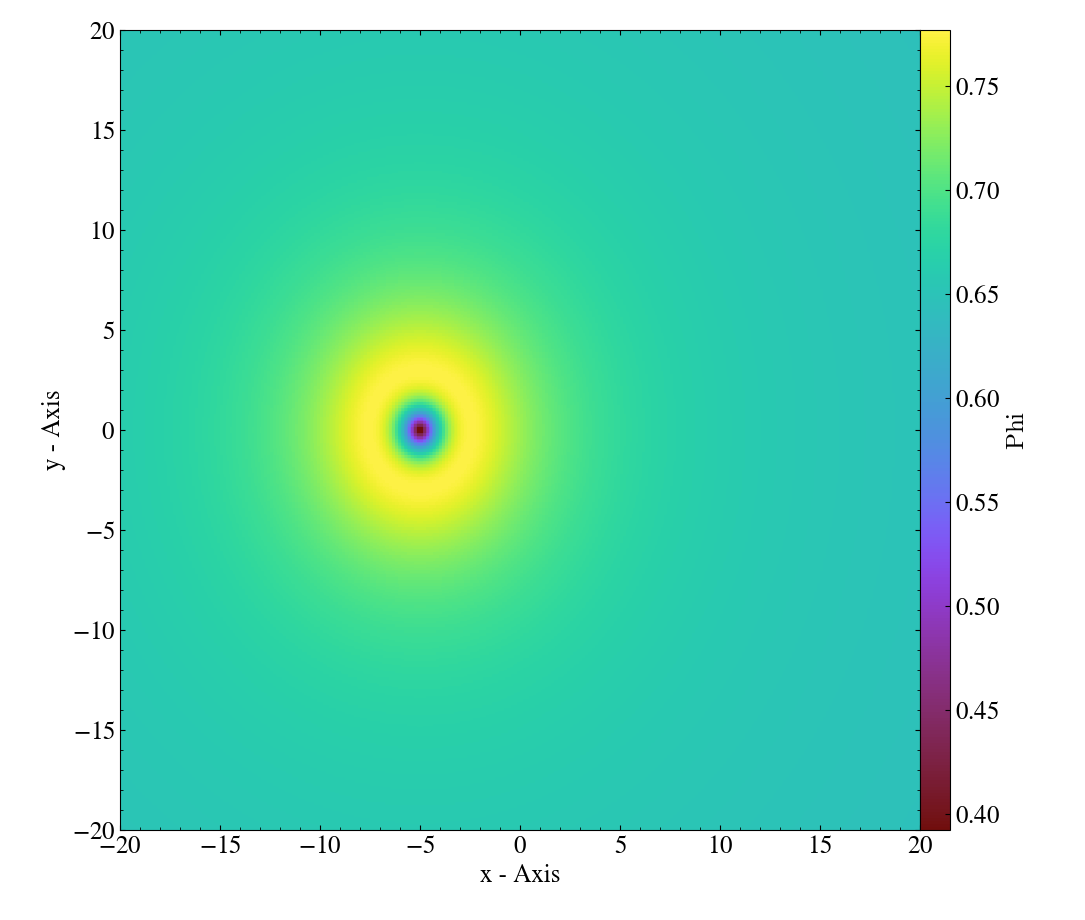

In [26]:
var = 'Phi'
s = yt.SlicePlot(dplot, 'z', ('boxlib', var), origin='native', center = [0,0,0.9])
s.set_log(('boxlib', var), False)
s.set_xlabel('x - Axis')
s.set_ylabel('y - Axis')
#s.hide_colorbar()
#s.annotate_cell_edges()
#s.annotate_grids()
s.zoom(1)
s.show()

var = 'phi'
for i in range(301):
    ident = list(str(int(5*i)+10000))
    ident[0] = '0'
    filename = "plt00"+"".join(ident)
    ds = yt.load(filename)
    s = yt.SlicePlot(ds, 'z', ('boxlib', var), origin='native', center = [0,0,0])
    s.set_log(('boxlib', var), False)
    s.set_xlabel('x - Axis')
    s.set_ylabel('y - Axis')
    s.hide_colorbar()
    #s.annotate_cell_edges()
    s.zoom(2)
    
    ident2 = list(str(i+10000))
    ident2[0] = '0'
    s.save("img"+"".join(ident2)+".png")

In [8]:
cg = dplot.covering_grid(left_edge=dplot.domain_left_edge, dims=dplot.domain_dimensions, level=0)
coords = cg.fcoords

xs = coords[:,0]
ys = coords[:,1]
zs = coords[:,2]

dx = np.max(xs[1:] - xs[:-1])
dy = np.max(ys[1:] - ys[:-1])
dz = np.max(zs[1:] - zs[:-1])

H = cg["Q6"][:,:,:].d

In [9]:
H[0, 0, 0]

2.0276912614961664

In [49]:
H[64, 64, 64]

1.2775443176769271e-10

In [49]:
H[0, 0, 0]

0.0010225271343679068